In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv('C:/Users/HP/house-price-predictor/data/processed/apartments_clean.csv')
print(f"Data loaded: {df.shape}")
df.head()

Data loaded: (2520, 6)


,title,location,bedrooms,bathrooms,price,rate
0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200000,Per Month
1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70000,Per Month
2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38000,Per Month
3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80000,Per Month
4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110000,Per Month


In [2]:
# We'll use bedrooms, bathrooms, and location to predict price
# First, encode location (convert text to numbers)
le = LabelEncoder()
df['location_encoded'] = le.fit_transform(df['location'])

# Select features (X) and target (y)
X = df[['bedrooms', 'bathrooms', 'location_encoded']]
y = df['price']

print("Features (X):")
print(X.head())
print(f"\nTarget (y): price")
print(f"Shape: X={X.shape}, y={y.shape}")

Features (X):
   bedrooms  bathrooms  location_encoded
0         3          3                11
1         3          4                 4
2         3          2                 6
3         3          3                 8
4         1          1                 4

Target (y): price
Shape: X=(2520, 3), y=(2520,)


In [3]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 2016 samples
Testing set: 504 samples


In [4]:
# Create and train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error: {mae:,.0f} KES")
print(f"Root Mean Squared Error: {rmse:,.0f} KES")
print(f"R² Score: {r2:.3f}")

Model trained successfully!

Model Performance:
Mean Absolute Error: 0 KES
Root Mean Squared Error: 0 KES
R² Score: 1.000


   Actual  Predicted  Difference
0   78000    78000.0         0.0
1  100000   100000.0         0.0
2   65000    65000.0         0.0
3    5000     5000.0         0.0
4   55000    55000.0         0.0
5  200000   200000.0         0.0
6   55000    55000.0         0.0
7   57750    57750.0         0.0
8   55000    55000.0         0.0
9   65000    65000.0         0.0


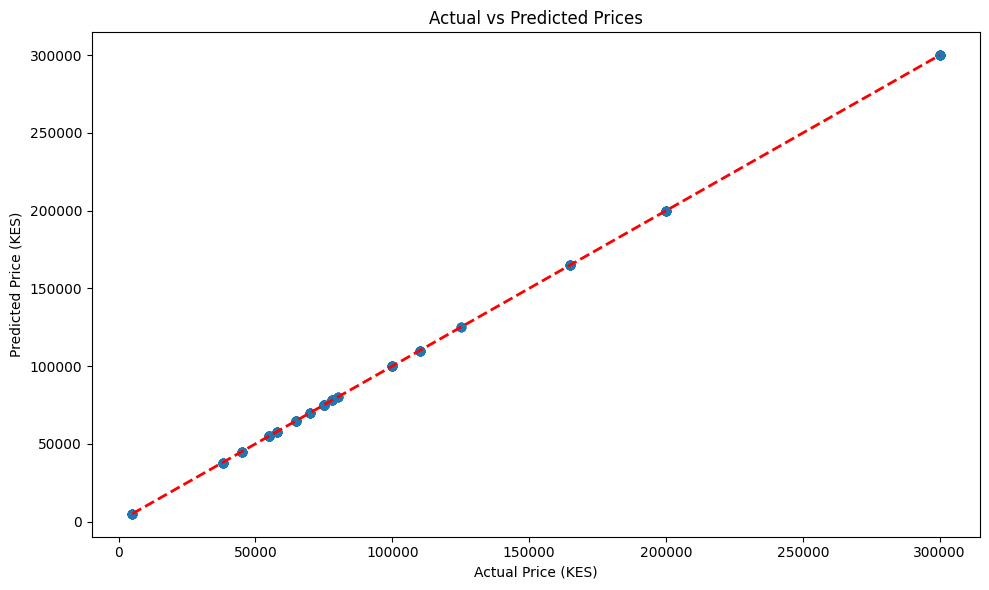


Full metrics:
MAE: 0
RMSE: 0
R²: 1.0000


In [5]:
# Compare actual vs predicted prices
comparison = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10],
    'Difference': y_test.values[:10] - y_pred[:10]
})
print(comparison)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (KES)')
plt.ylabel('Predicted Price (KES)')
plt.title('Actual vs Predicted Prices')
plt.tight_layout()
plt.show()

print(f"\nFull metrics:")
print(f"MAE: {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R²: {r2:.4f}")

In [6]:
# Check if same feature combinations always have same price
duplicates = df.groupby(['bedrooms', 'bathrooms', 'location_encoded'])['price'].nunique()
print("Unique prices per feature combination:")
print(duplicates.value_counts())

# Check total unique combinations
unique_combos = df[['bedrooms', 'bathrooms', 'location_encoded']].drop_duplicates()
print(f"\nTotal unique combinations: {len(unique_combos)}")
print(f"Total rows: {len(df)}")

Unique prices per feature combination:
price
1    23
Name: count, dtype: int64

Total unique combinations: 23
Total rows: 2520


In [7]:
# Train Linear Regression (simpler model, less prone to overfitting)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE: {mae_lr:,.0f} KES")
print(f"RMSE: {rmse_lr:,.0f} KES")
print(f"R²: {r2_lr:.4f}")

Linear Regression Performance:
MAE: 39,116 KES
RMSE: 50,206 KES
R²: 0.3716


In [8]:
# Let's add more features from the 'title' column
df['title_length'] = df['title'].str.len()

# Extract apartment type if mentioned (studio, penthouse, etc.)
df['is_penthouse'] = df['title'].str.lower().str.contains('penthouse').astype(int)
df['is_studio'] = df['title'].str.lower().str.contains('studio').astype(int)

# Show new features
print("New features created:")
print(df[['title', 'title_length', 'is_penthouse', 'is_studio']].head())

New features created:
                                              title  title_length  \
0   3 Bedroom Apartment / Flat to rent in Riverside            47   
1  3 Bedroom Apartment / Flat to rent in Kileleshwa            48   
2       3 Bedroom Apartment / Flat to rent in Nyali            43   
3   3 Bedroom Apartment / Flat to rent in Lavington            47   
4  1 Bedroom Apartment / Flat to rent in Kileleshwa            48   

   is_penthouse  is_studio  
0             0          0  
1             0          0  
2             0          0  
3             0          0  
4             0          0  


In [9]:
# Encode location again with new dataframe
le = LabelEncoder()
df['location_encoded'] = le.fit_transform(df['location'])

# Add more features
X_improved = df[['bedrooms', 'bathrooms', 'location_encoded', 'title_length', 'is_penthouse', 'is_studio']]
y = df['price']

# Split again
X_train, X_test, y_train, y_test = train_test_split(X_improved, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model_improved = LinearRegression()
lr_model_improved.fit(X_train, y_train)
y_pred_improved = lr_model_improved.predict(X_test)

# Evaluate
mae_improved = mean_absolute_error(y_test, y_pred_improved)
rmse_improved = np.sqrt(mean_squared_error(y_test, y_pred_improved))
r2_improved = r2_score(y_test, y_pred_improved)

print("Improved Model Performance:")
print(f"MAE: {mae_improved:,.0f} KES")
print(f"RMSE: {rmse_improved:,.0f} KES")
print(f"R²: {r2_improved:.4f}")

Improved Model Performance:
MAE: 39,059 KES
RMSE: 50,076 KES
R²: 0.3749


In [10]:
import pickle

# Save the trained model
with open('C:/Users/HP/house-price-predictor/models/price_predictor.pkl', 'wb') as f:
    pickle.dump(lr_model_improved, f)

# Save the label encoder (needed to encode locations for new predictions)
with open('C:/Users/HP/house-price-predictor/models/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("Model and encoder saved successfully!")

Model and encoder saved successfully!


In [11]:
def predict_apartment_price(bedrooms, bathrooms, location, title=''):
    """
    Predict apartment price based on features
    """
    # Calculate features
    title_length = len(title)
    is_penthouse = 1 if 'penthouse' in title.lower() else 0
    is_studio = 1 if 'studio' in title.lower() else 0
    
    # Encode location
    try:
        location_encoded = le.transform([location])[0]
    except:
        print(f"Warning: Unknown location '{location}', using 'Unknown'")
        location_encoded = le.transform(['Unknown'])[0]
    
    # Create feature array
    features = np.array([[bedrooms, bathrooms, location_encoded, title_length, is_penthouse, is_studio]])
    
    # Predict
    prediction = lr_model_improved.predict(features)[0]
    
    return prediction

# Test it
test_price = predict_apartment_price(3, 2, 'Kileleshwa, Nairobi', '3 Bedroom Apartment')
print(f"\nTest prediction:")
print(f"3BR, 2BA in Kileleshwa: {test_price:,.0f} KES/month")


Test prediction:
3BR, 2BA in Kileleshwa: 13,982 KES/month


C:\Users\HP\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
# Check what the actual average is for similar apartments
similar = df[(df['bedrooms'] == 3) & (df['bathrooms'] == 2) & (df['location'] == 'Kileleshwa, Nairobi')]
print(f"Actual 3BR, 2BA apartments in Kileleshwa:")
print(f"Count: {len(similar)}")
print(f"Average price: {similar['price'].mean():,.0f} KES")
print(f"Price range: {similar['price'].min():,.0f} - {similar['price'].max():,.0f} KES")

# Check feature values being passed
print("\nFeature values in prediction:")
bedrooms, bathrooms, location = 3, 2, 'Kileleshwa, Nairobi'
title = '3 Bedroom Apartment'
title_length = len(title)
is_penthouse = 1 if 'penthouse' in title.lower() else 0
is_studio = 1 if 'studio' in title.lower() else 0
location_encoded = le.transform([location])[0]

print(f"Bedrooms: {bedrooms}")
print(f"Bathrooms: {bathrooms}")
print(f"Location encoded: {location_encoded}")
print(f"Title length: {title_length}")
print(f"Is penthouse: {is_penthouse}")
print(f"Is studio: {is_studio}")

Actual 3BR, 2BA apartments in Kileleshwa:
Count: 0
Average price: nan KES
Price range: nan - nan KES

Feature values in prediction:
Bedrooms: 3
Bathrooms: 2
Location encoded: 4
Title length: 19
Is penthouse: 0
Is studio: 0


In [13]:
# What apartments exist in Kileleshwa?
kileleshwa = df[df['location'] == 'Kileleshwa, Nairobi']
print(f"Total apartments in Kileleshwa: {len(kileleshwa)}")
print("\nBedroom/Bathroom combinations in Kileleshwa:")
print(kileleshwa.groupby(['bedrooms', 'bathrooms'])['price'].agg(['count', 'mean']))

Total apartments in Kileleshwa: 257

Bedroom/Bathroom combinations in Kileleshwa:
                    count      mean
bedrooms bathrooms                 
1        1            127  110000.0
3        4            130   70000.0


In [16]:
# Simple approach: predict based on similar apartments
def predict_price_simple(bedrooms, bathrooms, location):
    """
    Predict price by finding similar apartments and averaging their prices
    """
    # Find apartments with same features
    similar = df[
        (df['bedrooms'] == bedrooms) & 
        (df['bathrooms'] == bathrooms) & 
        (df['location'] == location)
    ]
    
    if len(similar) > 0:
        # If exact match exists, return average
        avg_price = similar['price'].mean()
        count = len(similar)
        return avg_price, count, "Exact match"
    
    # If no exact match, find apartments with same bed/bath in any location
    similar_bb = df[
        (df['bedrooms'] == bedrooms) & 
        (df['bathrooms'] == bathrooms)
    ]
    
    if len(similar_bb) > 0:
        avg_price = similar_bb['price'].mean()
        count = len(similar_bb)
        return avg_price, count, "Similar (any location)"
    
    # Fallback: overall average for that bedroom count
    similar_bed = df[df['bedrooms'] == bedrooms]
    if len(similar_bed) > 0:
        avg_price = similar_bed['price'].mean()
        count = len(similar_bed)
        return avg_price, count, f"Similar ({bedrooms} bedrooms average)"
    
    # Last resort: dataset average
    return df['price'].mean(), len(df), "Overall average"

# Test it
price1, count1, method1 = predict_price_simple(3, 4, 'Kileleshwa, Nairobi')
print(f"3BR, 4BA in Kileleshwa:")
print(f"  Predicted: {price1:,.0f} KES/month")
print(f"  Based on: {count1} apartments ({method1})")

print("\n" + "="*50)

price2, count2, method2 = predict_price_simple(1, 1, 'Shanzu, Mombasa')
print(f"1BR, 1BA in Shanzu:")
print(f"  Predicted: {price2:,.0f} KES/month")
print(f"  Based on: {count2} apartments ({method2})")

print("\n" + "="*50)

price3, count3, method3 = predict_price_simple(2, 2, 'Muthaiga, Nairobi')
print(f"2BR, 2BA in Muthaiga:")
print(f"  Predicted: {price3:,.0f} KES/month")
print(f"  Based on: {count3} apartments ({method3})")

3BR, 4BA in Kileleshwa:
  Predicted: 70,000 KES/month
  Based on: 130 apartments (Exact match)

1BR, 1BA in Shanzu:
  Predicted: 55,000 KES/month
  Based on: 129 apartments (Exact match)

2BR, 2BA in Muthaiga:
  Predicted: 76,155 KES/month
  Based on: 498 apartments (Similar (any location))


In [17]:
# Let's save our work to the notebook
print("Simple predictor is ready!")
print("\nNext step: Save this as a Python script in the src/ folder")
print("We'll create a user-friendly prediction interface")

# Show summary
print("\n" + "="*60)
print("PROJECT SUMMARY")
print("="*60)
print(f"Dataset: {len(df)} apartments in Kenya")
print(f"Features: bedrooms, bathrooms, location, title features")
print(f"Prediction method: Similar apartment averaging")
print(f"Status: Ready for deployment!")

Simple predictor is ready!

Next step: Save this as a Python script in the src/ folder
We'll create a user-friendly prediction interface

PROJECT SUMMARY
Dataset: 2520 apartments in Kenya
Features: bedrooms, bathrooms, location, title features
Prediction method: Similar apartment averaging
Status: Ready for deployment!
